In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import matplotlib as mlp
import numpy as np
housing=fetch_california_housing()

In [2]:
import tensorflow as tf
from tensorflow import keras

2021-07-13 20:11:36.723263: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-13 20:11:36.723286: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
df=pd.DataFrame(housing.data,columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
df['Target']=housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
x=df.drop('Target',axis='columns')
y=df.Target

In [7]:
from sklearn.model_selection import train_test_split
x_trainfull,x_test,y_trainfull,y_test=train_test_split(x,y,random_state=42)
x_train,x_val,y_train,y_valid=train_test_split(x_trainfull,y_trainfull)

In [8]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
x_train=scaled.fit_transform(x_train)
x_test=scaled.transform(x_test)
x_valid=scaled.transform(x_test)

In [9]:
x_val.shape

(3870, 8)

In [10]:
x_train.shape

(11610, 8)

In [11]:
y_train.shape

(11610,)

In [12]:
np.random.seed(42)
tf.random.set_seed(42)
x_train.shape

(11610, 8)

In [13]:
print(x_val.shape)
print(y_valid.shape)

(3870, 8)
(3870,)


In [14]:
from tensorflow.keras import models,layers
model=models.Sequential([
        layers.Dense(30,activation='relu',input_shape=[8]),
        layers.Dense(30,activation='relu'),
        layers.Dense(1)
    ])

2021-07-13 20:11:37.886967: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-13 20:11:37.935708: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-13 20:11:37.935742: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sumangole): /proc/driver/nvidia/version does not exist
2021-07-13 20:11:37.936320: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(learning_rate=0.001),
             metrics=["mae"])

In [17]:
model_history=model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_valid))

2021-07-13 20:11:38.128619: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-13 20:11:38.129127: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1800000000 Hz


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8798 - mae: 0.9984 - val_loss: 106158.9219 - val_mae: 261.9732
Epoch 2/20
363/363 [==============================] - 0s 888us/step - loss: 0.6897 - mae: 0.6146 - val_loss: 73150.8516 - val_mae: 222.6416
Epoch 3/20
363/363 [==============================] - 0s 954us/step - loss: 0.6108 - mae: 0.5709 - val_loss: 62925.2383 - val_mae: 209.6592
Epoch 4/20
363/363 [==============================] - 0s 994us/step - loss: 0.5763 - mae: 0.5501 - val_loss: 49909.6328 - val_mae: 190.0338
Epoch 5/20
363/363 [==============================] - 0s 858us/step - loss: 0.5504 - mae: 0.5349 - val_loss: 48587.5195 - val_mae: 188.7738
Epoch 6/20
363/363 [==============================] - 0s 840us/step - loss: 0.5307 - mae: 0.5247 - val_loss: 46726.1094 - val_mae: 186.5000
Epoch 7/20
363/363 [==============================] - 0s 796us/step - loss: 0.5147 - mae: 0.5159 - val_loss: 41321.6016 - val_mae: 177.3482
Epoch 8/20
363/363 [=

In [18]:
mae_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 813us/step - loss: 0.4546 - mae: 0.4794


In [19]:
model_history.history

{'loss': [1.8798189163208008,
  0.689723789691925,
  0.6107799410820007,
  0.5762999653816223,
  0.5504323244094849,
  0.5306633710861206,
  0.5146814584732056,
  0.5020908713340759,
  0.4918152391910553,
  0.4837489724159241,
  0.47712042927742004,
  0.4716483950614929,
  0.467461496591568,
  0.46322935819625854,
  0.4602930545806885,
  0.457575261592865,
  0.4546668827533722,
  0.45195454359054565,
  0.4502260088920593,
  0.4478895962238312],
 'mae': [0.9984087347984314,
  0.6146185994148254,
  0.5708615779876709,
  0.550085186958313,
  0.5348646640777588,
  0.5246908664703369,
  0.5158790349960327,
  0.508262574672699,
  0.5032839179039001,
  0.49865132570266724,
  0.4939256012439728,
  0.49175506830215454,
  0.48954591155052185,
  0.4868198037147522,
  0.4854392409324646,
  0.48434582352638245,
  0.48187005519866943,
  0.4817926585674286,
  0.4793281555175781,
  0.47896912693977356],
 'val_loss': [106158.921875,
  73150.8515625,
  62925.23828125,
  49909.6328125,
  48587.51953125,


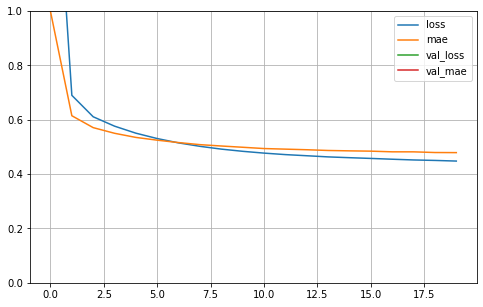

In [20]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
x_new=x_test[:3]

In [27]:
y_pred=model.predict(x_new)
print(y_test[:3])
print(y_pred)

20046    0.47700
3024     0.45800
15663    5.00001
Name: Target, dtype: float64
[[0.6040512]
 [1.7374005]
 [2.967846 ]]
